# Imports

In [1]:
import pandas as pd
import numpy as np

# Dataset

In [2]:
file = "ve_dataset_no_clean.csv"

# Chargement

In [3]:
df = pd.read_csv(file, sep =";", encoding="utf-8", skiprows=0)


In [4]:
df.head(2)

,fabricant,modele,annee,prix,puissance_cumul,couple_cumul,0_100_km_h,vitesse_max,position_moteur_1,puissance_moteur_1,...,largeur,coffre,poids,coffre_avant_arriere,essieu_avant,essieu_arriere,base_chassis,plateforme,pneus,pneus_arriere
0,Citroen,C-Zero,2012,26900 €,67 ch,196 Nm,15.9 secondes,130 km/h,Arrière,67 ch,...,1.475 m,166 Litres,1150 kg,NaN,Macpherson,Semi Rigide,Thermique,"<i style=""color:#A5A5A5"">NC</i>",145/65 R 15,175/55 R 15
1,Dacia,Spring Electric 45,2021,20800 €,45 ch,125 Nm,19.1 secondes,125 km/h,Avant,45 ch,...,1.579 m,270 Litres,1045 kg,NaN,Macpherson,Semi Rigide,Thermique,"<i style=""color:#A5A5A5"">NC</i>",165/70 R 14,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 53 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   fabricant                                     164 non-null    object 
 1   modele                                        163 non-null    object 
 2   annee                                         164 non-null    int64  
 3   prix                                          164 non-null    object 
 4   puissance_cumul                               164 non-null    object 
 5   couple_cumul                                  164 non-null    object 
 6   0_100_km_h                                    164 non-null    object 
 7   vitesse_max                                   164 non-null    object 
 8   position_moteur_1                             164 non-null    object 
 9   puissance_moteur_1                            164 non-null    obj

# Exploration

## Fabricant

In [6]:
df.fabricant.nunique()

29

In [7]:
df.fabricant.unique()

array(['Citroen', 'Dacia', 'Fiat', 'Nissan', 'Peugeot', 'Renault', 'Seat',
       'Smart', 'Volkswagen', 'Aiways', 'BMW', 'DS', 'Honda', 'Hyundai',
       'Kia', 'Mazda', 'MG', 'Mini', 'Opel', 'Skoda', 'Audi', 'Cupra',
       'Ford', 'Lexus', 'Mercedes', 'Tesla', 'Volvo', 'Jaguar', 'Porsche'],
      dtype=object)

**Note :**
- le dataset présente des ve de 29 fabricants

## Modèle

In [8]:
df.modele.nunique()

140

In [9]:
df.modele = [str(df.modele[i]).strip() for i in range(len(df.modele))]
df.modele.unique()

array(['C-Zero', 'Spring Electric 45', 'Spring Electric 65', '500e',
       'Leaf', 'Ion', 'Twingo III Z.E R80', 'Zoe Q210', 'Zoe R75',
       'Zoe Q90', 'Zoe R90', 'Zoe R110', 'Mii EV', 'Fortwo EQ', 'E-Up!',
       'E-Up! 2.0', 'U5', 'i3 60Ah', 'i3 94Ah', 'i3 120Ah',
       'E-Berlingo Standard', 'E-Berlingo XL', 'Ë-C4 Electric',
       'DS3 Crossback E-Tense', 'Honda-e', 'Honda-e Advance', 'Ioniq',
       'Kona', 'E-Niro', 'E-Soul', 'Soul EV', 'MX-30 E-Skyactiv',
       'Marvel R Comfort/luxury', 'MG5 Autonomie Standard',
       'MG5 Autonomie Etendue', 'ZS Standard Range', 'ZS Long Range',
       'nan', 'Leaf II', 'Corsa-e Electric', 'Mokka-e Electric',
       'e-2008 Electric', 'e-208 Electric', 'E-Rifter Standard',
       'Megane e-Tech EV40', 'Zoe II R110', 'Zoe II R135', 'Enyaq 50',
       'E-Golf', 'ID3 Pure', 'ID3 Pro', 'Q4 E-Tron 35', 'Q4 E-Tron 40',
       'Q4 E-Tron Sportback 35', 'i3 S 94Ah', 'i3 S 120Ah', 'Born V',
       'Born VZ58', 'Mustang Mach-e RWD Standard Range', 

In [10]:
# Patch spécifique "Mini"

df.loc[df.fabricant=="Mini", "modele"] = "Mini E Electric"

**Note :**
- le dataset présente 140 modèles différents de ve --> voir les versions / année

## Année

In [11]:
df.annee.nunique()

12

In [12]:
df.annee.describe()

count     164.000000
mean     2019.847561
std         2.335626
min      2011.000000
25%      2019.000000
50%      2021.000000
75%      2021.000000
max      2023.000000
Name: annee, dtype: float64

**Note :**
- le dataset présente des ve fabriqués entre 2011 et 2023

## Prix

In [13]:
df.prix.head(2)

0    26900 €
1    20800 €
Name: prix, dtype: object

In [14]:
df = df.rename(columns = {"prix" : "prix_Eur"})
df["prix_Eur"] = df["prix_Eur"].str.replace(" €","")
df.prix_Eur = df.prix_Eur.astype('int64')
#df.prix_eur.dtypes

In [15]:
df.prix_Eur.describe()

count       164.000000
mean      55997.682927
std       30753.784240
min       20800.000000
25%       36775.000000
50%       47300.000000
75%       64022.500000
max      191400.000000
Name: prix_Eur, dtype: float64

**Note :**
- le dataset présente des ve dont le prix varie de 21k à 191k €
- prix moyen : 56k €
- prix médian : 47k €

In [16]:
df2 = df.copy()
df2["count"] =1
group = df2.groupby(by=["fabricant","annee", "modele"]).sum()
group["count"].max()

2

In [17]:
group.loc[group["count"] == 8]

,,,prix_Eur,Unnamed: 37,rapports,count
fabricant,annee,modele,,,,


In [18]:
df2.loc[(df2.fabricant == "Audi") & (df2.annee == 2021) & (df.modele == "Q4")].loc[:,"fabricant":"vitesse_max"]

,fabricant,modele,annee,prix_Eur,puissance_cumul,couple_cumul,0_100_km_h,vitesse_max


## Puissance cumulée

In [19]:
df.puissance_cumul.head(2)

0    67 ch
1    45 ch
Name: puissance_cumul, dtype: object

In [20]:
df = df.rename(columns = {"puissance_cumul" : "puissance_cumul_Ch"})
df["puissance_cumul_Ch"] = df["puissance_cumul_Ch"].str.replace(" ch","")
df.puissance_cumul_Ch = df.puissance_cumul_Ch.astype('int')
df.puissance_cumul_Ch.head(2)

0    67
1    45
Name: puissance_cumul_Ch, dtype: int32

In [21]:
df.puissance_cumul_Ch.describe()

count    164.000000
mean     245.347561
std      147.066055
min       45.000000
25%      136.000000
50%      204.000000
75%      306.000000
max      760.000000
Name: puissance_cumul_Ch, dtype: float64

**Note :**
- le dataset présente des ve dont la puissance cumulée va de 45 ch à 760 ch !
- une puissance > 700 ch semble avoir été atteinte avec un moteur à explosion (suralimenté) qu'en 2019... 
https://www.largus.fr/actualite-automobile/ford-mustang-760-ch-pour-la-nouvelle-shelby-gt500-9849398.html

## Couple cumulé

In [22]:
df.couple_cumul.head(2)

0    196 Nm
1    125 Nm
Name: couple_cumul, dtype: object

In [23]:
df = df.rename(columns = {"couple_cumul" : "couple_cumul_Nm"})
df["couple_cumul_Nm"] = df["couple_cumul_Nm"].str.replace(" Nm","")
df.couple_cumul_Nm = df.couple_cumul_Nm.astype('int')
df.couple_cumul_Nm.head(2)

0    196
1    125
Name: couple_cumul_Nm, dtype: int32

In [24]:
df.couple_cumul_Nm.describe()

count     164.000000
mean      413.237805
std       206.069315
min       113.000000
25%       260.000000
50%       317.500000
75%       520.000000
max      1100.000000
Name: couple_cumul_Nm, dtype: float64

Rappel : 

Puissance (Watt) = Couple (Nm) x Régime (rad/s)

## 0 à 100 km/h

In [25]:
df["0_100_km_h"].head(2)

0    15.9 secondes
1    19.1 secondes
Name: 0_100_km_h, dtype: object

In [26]:
df = df.rename(columns = {"0_100_km_h" : "tps_acc_0_100_Sec"})
df["tps_acc_0_100_Sec"] = df["tps_acc_0_100_Sec"].str.replace(" secondes","")
df.tps_acc_0_100_Sec = df.tps_acc_0_100_Sec.astype('float')
df.tps_acc_0_100_Sec.head(2)

0    15.9
1    19.1
Name: tps_acc_0_100_Sec, dtype: float64

In [27]:
df.tps_acc_0_100_Sec.describe()

count    164.000000
mean       8.054268
std        2.939458
min        2.800000
25%        6.100000
50%        7.850000
75%        9.825000
max       19.100000
Name: tps_acc_0_100_Sec, dtype: float64

**Note :**
- bien meilleurs scores que les véhicules thermiques
- record du monde (a priori) en 2019 : 1.9 sec.
- record du monde (thermique) en 2020 : 2.4 sec.
https://www.auto-moto.com/actualite/en-chiffres/voitures-plus-rapides-0-a-100-km-h-classement-254578.html#item=1

Ca doit être à ça que sert les 3 moteurs...

## Vitesse maximale

In [28]:
df.vitesse_max.head(2)

0    130 km/h
1    125 km/h
Name: vitesse_max, dtype: object

In [29]:
df = df.rename(columns = {"vitesse_max" : "vitesse_max_Km_h"})
df["vitesse_max_Km_h"] = df["vitesse_max_Km_h"].str.replace(" km/h","")
df.vitesse_max_Km_h = df.vitesse_max_Km_h.astype('int')
df.vitesse_max_Km_h.head(2)

0    130
1    125
Name: vitesse_max_Km_h, dtype: int32

In [30]:
df.vitesse_max_Km_h.describe()

count    164.000000
mean     172.865854
std       35.114978
min      125.000000
25%      150.000000
50%      160.000000
75%      186.250000
max      260.000000
Name: vitesse_max_Km_h, dtype: float64

**Note :**
- Vitesse max à 125 km/h (!), c'est assez surprenant -> focus

### focus : identification du véhicule ayant min(vitesse max)

In [31]:
df.loc[df.vitesse_max_Km_h == df.vitesse_max_Km_h.min()]

,fabricant,modele,annee,prix_Eur,puissance_cumul_Ch,couple_cumul_Nm,tps_acc_0_100_Sec,vitesse_max_Km_h,position_moteur_1,puissance_moteur_1,...,largeur,coffre,poids,coffre_avant_arriere,essieu_avant,essieu_arriere,base_chassis,plateforme,pneus,pneus_arriere
1,Dacia,Spring Electric 45,2021,20800,45,125,19.1,125,Avant,45 ch,...,1.579 m,270 Litres,1045 kg,NaN,Macpherson,Semi Rigide,Thermique,"<i style=""color:#A5A5A5"">NC</i>",165/70 R 14,NaN
2,Dacia,Spring Electric 65,2023,22300,65,113,13.7,125,Avant,65 ch,...,1.579 m,270 Litres,1050 kg,NaN,Macpherson,Semi Rigide,Thermique,"<i style=""color:#A5A5A5"">NC</i>",165/70 R 14,NaN


**Note :**
- On aurait pu se douter que c'était de l'entrée de gamme et/ou ancienne. Il s'avère qu'il s'agit de la Dacia Spring (2021 et 2023), parmi les moins chers.

## Position individuelle des moteurs

In [32]:
print(list(df.position_moteur_1.unique()))
df.position_moteur_1.value_counts()

['Arrière', 'Avant']


Avant      119
Arrière     45
Name: position_moteur_1, dtype: int64

In [33]:
print(list(df.position_moteur_2.unique()))
df.position_moteur_2.value_counts(dropna = False)

[nan, 'Arrière']


NaN        112
Arrière     52
Name: position_moteur_2, dtype: int64

In [34]:
df.position_moteur_2.fillna("").head(3)
df.position_moteur_2.value_counts(dropna = False)

NaN        112
Arrière     52
Name: position_moteur_2, dtype: int64

In [35]:
df.position_moteur_3.fillna("").head(3)
df.position_moteur_3.value_counts(dropna = False)

NaN        161
Arrière      3
Name: position_moteur_3, dtype: int64

**Note :*
- Le moteur "principal peut être positionné à l'avant ou à l'arrière
- Les moteurs n°2 et n°3 sont systématiquement positionnés à l'arrière du véhicule

## Puissance individuelle des moteurs

In [36]:
df = df.rename(columns = {"puissance_moteur_1" : "puissance_moteur_1_Ch"})
df["puissance_moteur_1_Ch"] = df["puissance_moteur_1_Ch"].str.replace(" ch","")
df.loc[df.puissance_moteur_1_Ch == '<i style="color:#A5A5A5">NC</i>', "puissance_moteur_1_Ch"] = np.nan
#df.puissance_moteur_1_Ch = df.puissance_moteur_1_Ch.astype('int')
#df.puissance_moteur_1_Ch.value_counts(dropna = False)

In [37]:
df = df.rename(columns = {"puissance_moteur_2" : "puissance_moteur_2_Ch"})
df["puissance_moteur_2_Ch"] = df["puissance_moteur_2_Ch"].str.replace(" ch","")
df.loc[(df.puissance_moteur_2_Ch == '<i style="color:#A5A5A5">NC</i>'), "puissance_moteur_2_Ch"] = np.nan
#df.loc[df.puissance_moteur_2_Ch == np.nan, "puissance_moteur_2_Ch"] = 0
#df.puissance_moteur_2_Ch = df.puissance_moteur_2_Ch.fillna(0)
#df.puissance_moteur_2_Ch = df.puissance_moteur_2_Ch.astype('int')

In [ ]:
df = df.rename(columns = {"puissance_moteur_3" : "puissance_moteur_3_Ch"})
df["puissance_moteur_3_Ch"] = df["puissance_moteur_3_Ch"].str.replace(" ch","")
df.loc[(df.puissance_moteur_3_Ch == '<i style="color:#A5A5A5">NC</i>'), "puissance_moteur_3_Ch"] = np.nan
#df.loc[df.puissance_moteur_3_Ch == np.nan, "puissance_moteur_3_Ch"] = 0
#df.puissance_moteur_3_Ch = df.puissance_moteur_3_Ch.fillna(0)
#df.puissance_moteur_3_Ch = df.puissance_moteur_3_Ch.astype('int')

## Type individuel des moteurs

In [ ]:
df.type_moteur_1.value_counts(dropna = False)

In [ ]:
df.type_moteur_2.value_counts(dropna = False)

In [ ]:
df.type_moteur_3.value_counts(dropna = False)

## Couple individuel des moteurs

In [ ]:
df = df.rename(columns = {"couple_moteur_1" : "couple_moteur_1_Nm"})
df["couple_moteur_1_Nm"] = df["couple_moteur_1_Nm"].str.replace(" Nm","")
df.loc[df.couple_moteur_1_Nm == '<i style="color:#A5A5A5">NC</i>', "couple_moteur_1_Nm"] = np.nan
#df.couple_moteur_1_Nm = df.couple_moteur_1_Nm.fillna(0)
#df.couple_moteur_1_Nm = df.couple_moteur_1_Nm.astype('int')
#df.couple_moteur_1_Nm.value_counts(dropna = False).head()

In [ ]:
df = df.rename(columns = {"couple_moteur_2" : "couple_moteur_2_Nm"})
df["couple_moteur_2_Nm"] = df["couple_moteur_2_Nm"].str.replace(" Nm","")
df.loc[df.couple_moteur_2_Nm == '<i style="color:#A5A5A5">NC</i>', "couple_moteur_2_Nm"] = np.nan
#df.couple_moteur_2_Nm = df.couple_moteur_2_Nm.fillna(0)
#df.couple_moteur_2_Nm = df.couple_moteur_2_Nm.astype('int')
#df.couple_moteur_2_Nm.value_counts(dropna = False).head()

In [ ]:
df = df.rename(columns = {"couple_moteur_3" : "couple_moteur_3_Nm"})
df["couple_moteur_3_Nm"] = df["couple_moteur_3_Nm"].str.replace(" Nm","")
df.loc[df.couple_moteur_3_Nm == '<i style="color:#A5A5A5">NC</i>', "couple_moteur_3_Nm"] = np.nan
#df.couple_moteur_3_Nm = df.couple_moteur_3_Nm.fillna(0)
#df.couple_moteur_3_Nm = df.couple_moteur_3_Nm.astype('int')
#df.couple_moteur_3_Nm.value_counts(dropna = False).head()

## Type d'homologation

In [ ]:
df.homologation_autonomie.value_counts(dropna=False)

## Capacité nominale / brute

In [ ]:
df.capacite_nominale_brute.head(2)

In [ ]:
df = df.rename(columns = {"capacite_nominale_brute" : "capacite_nominale_brute_KWh"})
df["capacite_nominale_brute_KWh"] = df["capacite_nominale_brute_KWh"].str.replace(" kWh","")
#df.capacite_nominale_brute_KWh = df.capacite_nominale_brute_KWh.astype('float')


## Capacité utile / nette

In [ ]:
df.capacite_utile_nette.head(2)

In [ ]:
df = df.rename(columns = {"capacite_utile_nette" : "capacite_utile_nette_KWh"})
df["capacite_utile_nette_KWh"] = df["capacite_utile_nette_KWh"].str.replace(" kWh","")
df.loc[df.capacite_utile_nette_KWh == '<i style="color:#A5A5A5">NC</i>', "capacite_utile_nette_KWh"] = np.nan
#df.capacite_utile_nette_KWh = df.capacite_utile_nette_KWh.fillna(0)
#df.capacite_utile_nette_KWh = df.capacite_utile_nette_KWh.astype('float')

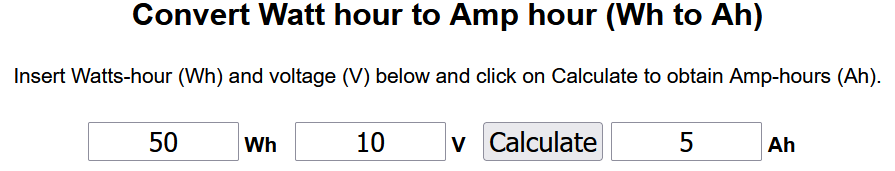

**Note :**
- il semble y avoir un souci au niveau des unités des capacités. En effet, la capacité d'une batterie s'exprime en Ampère-heure et non en Watt-heure.

## Prise de charge AC

In [ ]:
df = df.rename(columns = {"prise_de_charge_AC" : "prise_charge_AC"})
df.prise_charge_AC.value_counts()

**Note :**
- visiblement, cette donnée n'a pas beaucoup d'intérêt. Valeur commune à toutes les voitures.

## Prise de charge DC

In [ ]:
df = df.rename(columns = {"prise_de_charge_DC" : "prise_charge_DC"})
df.prise_charge_DC.value_counts()

## Vitesse de charge AC

In [ ]:
df = df.rename(columns = {"vitesse_de_charge_AC" : "vitesse_charge_AC"})
df.vitesse_charge_AC.value_counts(dropna=False)

In [ ]:
df = df.rename(columns = {"vitesse_charge_AC" : "vitesse_charge_AC_KW"})
df["vitesse_charge_AC_KW"] = df["vitesse_charge_AC_KW"].str.replace(" kW","")

In [ ]:
df = df.rename(columns = {"vitesse_de_charge_AC_option" : "vitesse_charge_AC_option_KW"})
df["vitesse_charge_AC_option_KW"] = df["vitesse_charge_AC_option_KW"].str.replace(" kW","")

**Note :**
- il semble y avoir un souci au niveau des unités des vitesses de charge. En effet, une vitesse s'exprime notamment avec une notion de temps. Or, le Watt ne contient pas de temps.

## Vitesse de charge DC

In [ ]:
df = df.rename(columns = {"vitesse_de_charge_DC" : "vitesse_charge_DC"})
df.vitesse_charge_DC.value_counts()

In [ ]:
df = df.rename(columns = {"vitesse_charge_DC" : "vitesse_charge_DC_KW"})
df["vitesse_charge_DC_KW"] = df["vitesse_charge_DC_KW"].str.replace(" kW","")

In [ ]:
df = df.rename(columns = {"vitesse_de_charge_DC_option" : "vitesse_charge_DC_option_KW"})
df["vitesse_charge_DC_option_KW"] = df["vitesse_charge_DC_option_KW"].str.replace(" kW","")

In [ ]:
# Recalage des données de "vitesse de charge"
for i in range(len(df)):
    
    if (str(df.vitesse_charge_DC_KW[i]).isalpha()) | (str(df.vitesse_charge_DC_KW[i]) == "1"):
        df.loc[i, "refroidissement"] = df.vitesse_charge_DC_KW[i]
        df.loc[i, "vitesse_charge_DC_KW"] = df.vitesse_charge_AC_option_KW[i]
        df.loc[i, "vitesse_charge_AC_option_KW"] = np.nan
        
    elif (str(df.vitesse_charge_DC_option_KW[i]).isalpha()) | (str(df.vitesse_charge_DC_option_KW[i]) == "1"):
        df.loc[i, "refroidissement"] = df.vitesse_charge_DC_option_KW[i]
        df.loc[i, "vitesse_charge_DC_option_KW"] = np.nan
        
        if str(df.vitesse_charge_AC_option_KW[i]) == "0":
            df.loc[i, "vitesse_charge_DC_option_KW"] = df.vitesse_charge_DC_KW[i]
            df.loc[i, "vitesse_charge_DC_KW"] = df.vitesse_charge_AC_option_KW[i]   
            df.loc[i, "vitesse_charge_AC_option_KW"] = np.nan
            

In [ ]:
# Patch spécifique "Volkswagen"
for i in range(len(df)):
    
    if (df.fabricant[i] == Volkswagen) & (str(df.vitesse_charge_AC_option_KW[i]) == "50"):
        df.loc[i, "vitesse_charge_DC_option_KW"] = df.vitesse_charge_DC_KW[i]
        df.loc[i, "vitesse_charge_DC_KW"] = df.vitesse_charge_AC_option_KW[i]   
        df.loc[i, "vitesse_charge_AC_option_KW"] = np.nan


In [ ]:
df.loc[102:108,"vitesse_charge_AC_KW":'refroidissement']

## Temps de charge

In [ ]:
df = df.rename(columns = {"temps_de_charge_DC_0-80%" : "temps_charge_DC_0_80"})

In [ ]:
df = df.rename(columns = {"temps_de_charge_AC_0-80%_prise_dom" : "temps_charge_AC_0_80_prise_dom_2_3kW"})
df["temps_charge_AC_0_80_prise_dom_2_3kW"] = df["temps_charge_AC_0_80_prise_dom_2_3kW"].str.replace(" à 2.3 kW","", regex=False)

In [ ]:
df = df.rename(columns = {"temps_de_charge_AC_0-80%_prise_dom_renforcee" : "temps_charge_AC_0_80_prise_dom_renforcee_3kW"})
df["temps_charge_AC_0_80_prise_dom_renforcee_3kW"] = df["temps_charge_AC_0_80_prise_dom_renforcee_3kW"].str.replace(" à 3 kW","", regex=False)

In [ ]:
# Wallbox est un fournisseur de box de recharge - plusieurs modèles - pas pertinent -> drop !
df = df.drop("temps_de_charge_AC_0-80%_wallbox", axis=1)

In [ ]:
#df.loc[:,"refroidissement":"autonomie_electrique_mixte"].head(5)

## Autonomie électrique

In [ ]:
df = df.rename(columns = {"autonomie_electrique_mixte" : "autonomie_electrique_mixte_Km"})
df["autonomie_electrique_mixte_Km"] = df["autonomie_electrique_mixte_Km"].str.replace(" km","")

In [ ]:
df.autonomie_electrique_mixte_Km.describe()

## Consommation électrique

In [ ]:
df = df.rename(columns = {"conso_electrique" : "conso_electrique_KWh_100km"})
df["conso_electrique_KWh_100km"] = df["conso_electrique_KWh_100km"].str.replace("kWh/100km","")
df.loc[df.conso_electrique_KWh_100km == '<i style="color:#A5A5A5">NC</i>', "conso_electrique_KWh_100km"] = np.nan

In [ ]:
df.conso_electrique_KWh_100km.value_counts(dropna=False)

### focus : qq stats de la Consommation électrique au 100km

In [ ]:
focus = df.loc[~df.conso_electrique_KWh_100km.isnull()]
focus = focus.conso_electrique_KWh_100km.astype('float')
focus.describe()

## Pompe à chaleur

In [ ]:
df = df.rename(columns = {"pompe_a_chaleur" : "pompe_chaleur"})
df.pompe_chaleur.value_counts(dropna=False)

## Unnamed: 37 -> drop

In [ ]:
df["Unnamed: 37"].value_counts(dropna = False)

In [ ]:
df = df.drop("Unnamed: 37", axis=1)

## Motricité

In [ ]:
df.motricite.value_counts(dropna = False)

## Rapports

In [ ]:
df.rapports.value_counts(dropna = False)

**Note :**
- "0" rapport ?! -> à creuser

## Longueur

In [ ]:
df = df.rename(columns = {"longueur" : "longueur_M"})
df["longueur_M"] = df["longueur_M"].str.replace(" m","")
df.longueur_M = df.longueur_M.astype('float')

In [ ]:
df.longueur_M.describe()

In [ ]:
# Focus sur les données aberrantes 
sorted(list(df.longueur_M),reverse=True)[:5]

In [ ]:
df.loc[df.longueur_M > 6, "longueur_M"]

In [ ]:
# Patch spécifique !
df.loc[df.longueur_M == 56990.0, "longueur_M"] = 5.699
df.loc[df.longueur_M == 5140.0, "longueur_M"] = 5.140


## Empattement

Rappel : empattement = distance entre les roues avant et les routes arrière

In [ ]:
df = df.rename(columns = {"empattement" : "empattement_M"})
df["empattement_M"] = df["empattement_M"].str.replace(" m","")
df.empattement_M = df.empattement_M.astype('float')

In [ ]:
df.empattement_M.describe()

## Hauteur

In [ ]:
df = df.rename(columns = {"hauteur" : "hauteur_M"})
df["hauteur_M"] = df["hauteur_M"].str.replace(" m","")
df.hauteur_M = df.hauteur_M.astype('float')

In [ ]:
df.hauteur_M.describe()

In [ ]:
# Focus sur les données aberrantes 
sorted(list(df.hauteur_M),reverse=True)[:5]

In [ ]:
# Patch spécifique !
df.loc[df.hauteur_M == 4.712, "hauteur_M"] = 1.712

## Largeur

In [ ]:
df = df.rename(columns = {"largeur" : "largeur_M"})
df["largeur_M"] = df["largeur_M"].str.replace(" m","")
df.largeur_M = df.largeur_M.astype('float')

In [ ]:
df.largeur_M.describe()

## Contenance du coffre

In [ ]:
df = df.rename(columns = {"coffre" : "coffre_L"})
df["coffre_L"] = df["coffre_L"].str.replace(" Litres","")
df.coffre_L = df.coffre_L.astype('float')

In [ ]:
df.coffre_L.describe()

In [ ]:
sorted(list(df.coffre_L),reverse=True)[:8]

**Note :**
- un coffre de 166 L ?! -> à creuser
- un coffre de 1950 L ?! -> à creuser

## Poids

In [ ]:
df = df.rename(columns = {"poids" : "poids_Kg"})
df["poids_Kg"] = df["poids_Kg"].str.replace(" kg","")
df.poids_Kg = df.poids_Kg.astype('float')

In [ ]:
df.poids_Kg.describe()

## Coffre avant/arrière

In [ ]:
df.coffre_avant_arriere.value_counts(dropna =False)

In [ ]:
df = df.rename(columns = {"coffre_avant_arriere" : "coffre_avant_arriere_L"})
df["coffre_avant_arriere_L"] = df["coffre_avant_arriere_L"].str.replace(" Litres","")

## Essieu avant

In [ ]:
df.essieu_avant.value_counts(dropna=False)

## Essieu arrière

In [ ]:
df.essieu_arriere.value_counts(dropna=False)

In [ ]:
# Patch spécifique !
df.loc[df.essieu_arriere == "Semi Rigide", "essieu_arriere"] = "Semi-rigide"
df.loc[df.essieu_arriere == "Essieu De Dion", "essieu_arriere"] = "De Dion"
df.essieu_arriere.value_counts(dropna=False)

## Base châssis

In [ ]:
df.base_chassis.value_counts(dropna = False)

## Plateforme

In [ ]:
df.plateforme.value_counts(dropna = False)

In [ ]:
df.loc[df.plateforme == '<i style="color:#A5A5A5">NC</i>', "plateforme"] = np.nan

df.plateforme.value_counts(dropna = False)

## Pneus

In [ ]:
df.pneus.value_counts(dropna = False)

## Pneus arrière

In [ ]:
df.pneus_arriere.value_counts(dropna = False)

### Focus sur les véhicules précisant des pneus arrière

In [ ]:
focus = df.loc[~df.pneus_arriere.isnull(), ["pneus","pneus_arriere"]]
focus["test"]=0
focus.loc[df.pneus == df.pneus_arriere, "test"]=1
focus

**Note :**
- Lorsque le type de pneu arrière est précisé, les pneus avant et arrière ne sont pas du même type.
- Quid des pneus avec la mention "(Ar)" ?

In [ ]:
df.loc[df.pneus.str.contains("(", regex=False), ["fabricant", "modele","annee", "pneus", "pneus_arriere"]]

# Sauvegarde

In [ ]:
df.to_csv("ve_dataset_clean.csv", sep=";", encoding="utf-8", index=False)

In [ ]:
#df.iloc[7]